<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The link
at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ProjectWriting/projectwriting.ipynb>
gives some guidance. See also the grading suggestion at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

Furthermore, at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/>
you can find examples of previous reports. How to write reports will
also be discussed during the various lab sessions. Please do ask us if you are in doubt.

When using codes and material from other  sources, you should refer to these in the bibliography of your report, indicating  wherefrom you for example
got the code, whether this is from the lecture notes, softwares like
Scikit-Learn, TensorFlow, PyTorch or  other sources. These should
always be cited correctly. How to cite some of the libraries is often
indicated from their corresponding GitHub sites or websites, see for example how to cite Scikit-Learn at  <https://scikit-learn.org/dev/about.html>. 

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

**A small recommendation when developing the codes here**. Instead of
jumping on to the two-dimensional function described below, we
recommend to do the code development and testing with a simpler
one-dimensional function, similar to those discussed in the exercises
of weeks 35 and 36. A simple test, as discussed during the lectures the first
three weeks is to set the design matrix equal to the identity
matrix. Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function

We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.

Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and a $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

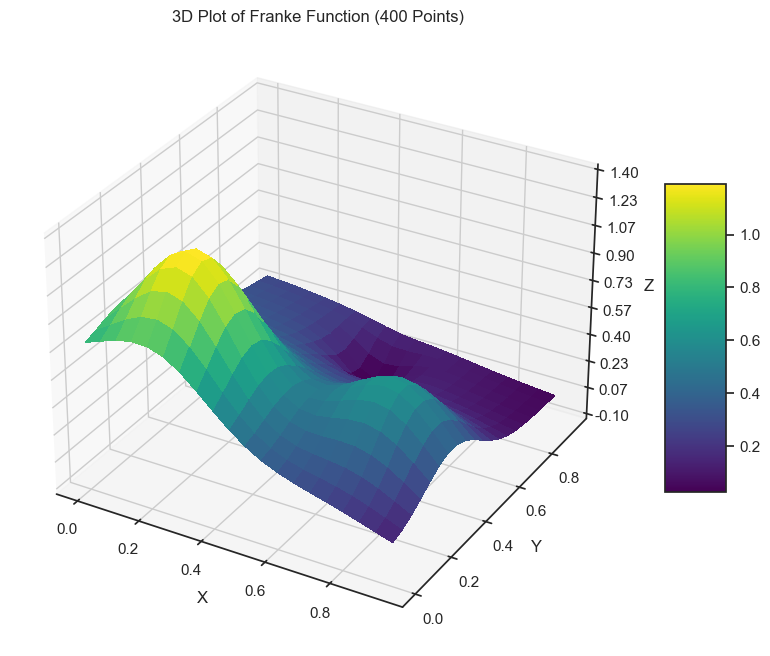

In [44]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Make data --> we can increase the number of datapoints and see how the results change.
x = np.arange(0, 1, 0.05) # default = 0.05 
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title('3D Plot of Franke Function (400 Points)', fontsize=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [45]:
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Make data. using 60000 data points
# x = np.linspace(0, 1, 245)
# y = np.linspace(0, 1, 245)

# # Create the meshgrid for 245x245 --> essential if we increase the number of x,y
# x, y = np.meshgrid(x, y)

# def FrankeFunction(x, y):
#     term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
#     term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
#     term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
#     term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
#     return term1 + term2 + term3 + term4
# z = FrankeFunction(x, y)

# # Plot
# surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)
# ax.set_zlim(-0.10, 1.40)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# # ax.set_title('3D Plot of Franke Function (60,000 Points)', fontsize=12)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# fig.colorbar(surf, shrink=0.5, aspect=5)

# # plt.savefig('franke_plot.pdf', format='pdf')

# plt.show()

If you wish to compare your results with other on the Franke function or other popular functions tested with linear regression, see the list in Figure 1 of the article by Cook et al at <https://arxiv.org/abs/2401.11694>.

### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35 and week 36.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

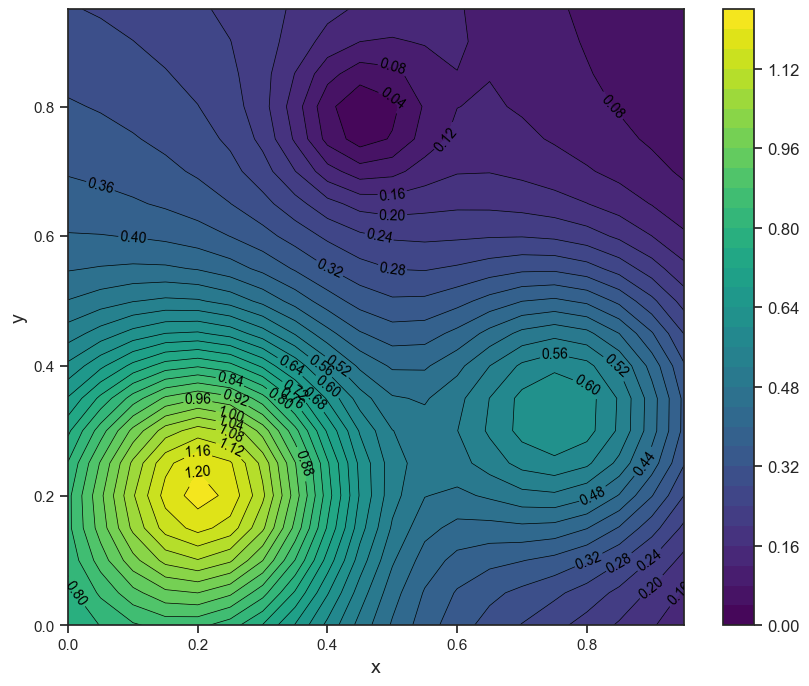

In [46]:
fig, ax = plt.subplots(figsize=(10,8), dpi = 100)
contour = ax.contourf(x, y, z, levels=30, cmap='viridis')

# contour lines on top of the filled contours
contour_lines = ax.contour(x, y, z, levels=30, colors='black', linewidths=0.5)

# contour labels
ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
# ax.set_title('Contour Plot of Franke Function', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

# ax.grid(True, linestyle='--', alpha=0.6)

cbar = fig.colorbar(contour, ax=ax)
cbar.ax.tick_params(labelsize=12)

ax.set_aspect('equal', 'box')
# plt.savefig('/Users/gabrieledurante/Desktop/franke_plot.pdf', format='pdf')
plt.show()

In [47]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# # Creating the contour plot
# fig, ax = plt.subplots(figsize=(10, 8), dpi=300)  # High DPI for better quality in LaTeX

# # Filled contours
# contour = ax.contourf(x, y, z, levels=30, cmap=cm.viridis, alpha=0.8)

# # Contour lines on top of filled contours
# contour_lines = ax.contour(x, y, z, levels=30, colors='black', linewidths=0.5)

# # Contour labels
# ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")

# # Axis labels
# ax.set_xlabel('x', fontsize=14)
# ax.set_ylabel('y', fontsize=14)

# # Color bar settings
# cbar = fig.colorbar(contour, ax=ax)
# cbar.ax.tick_params(labelsize=12)

# # Setting aspect ratio
# ax.set_aspect('equal', 'box')

# # Save the figure as a PDF for LaTeX
# # plt.savefig('franke_plot.pdf', format='pdf', bbox_inches='tight')
# plt.show()

In [48]:
# fig, ax = plt.subplots(figsize=(10, 8))
# heatmap = ax.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='plasma')
# ax.set_title('Heatmap Plot of Franke Function', fontsize=16)
# ax.set_xlabel('x', fontsize=14)
# ax.set_ylabel('y', fontsize=14)
# fig.colorbar(heatmap, ax=ax)
# plt.show()

### Solution (not scaled data)

In [49]:
# first we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 1000 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

print(np.var(z))

0.08789466766085462


In [50]:
# defining a func to create the design matrix

def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in poly
    X = np.ones((N, l)) # --> we use ones matrix as starting point
    idx = 1
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x**(i-j)) * (y**j)
            idx += 1
    return X

# Create design matrix for fifth-degree polynomial
X_manual = design_matrix(x, y, 5)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# OLS using matrix inversion
beta_manual = np.linalg.inv(X_manual.T @ X_manual) @ X_manual.T @ z

# Predictions
z_pred_manual = X_manual @ beta_manual
mse_manual = mean_squared_error(z, z_pred_manual)
print(f"Manual OLS MSE:\t {mse_manual:.5f}")

r2_manual = r2_score(z, z_pred_manual)
print(f"Manual OLS R2:\t {r2_manual:.5f}")

Manual OLS MSE:	 0.01216
Manual OLS R2:	 0.86161


In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sklearn implementation
X = np.column_stack((x, y))
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, z)

# Sklearn predictions
z_pred_sklearn = model.predict(X_poly)
mse_sklearn = mean_squared_error(z, z_pred_sklearn)
print(f"Sklearn OLS MSE:\t{mse_sklearn:.5f}")

r2_sklearn = r2_score(z, z_pred_sklearn)
print(f"Sklearn OLS R2:\t\t{r2_sklearn:.5f}")

Sklearn OLS MSE:	0.01216
Sklearn OLS R2:		0.86161


In [53]:
# Compare methods coefficients
print("Manual OLS Coefficients:\n", beta_manual)
print("Sklearn Coefficients:\n", np.concatenate(([model.intercept_], model.coef_)))

Manual OLS Coefficients:
 [  0.35206208   7.92595459   4.74888797 -35.09644201 -15.15859034
 -14.53999576  50.12716664  42.9691747   24.69986732   4.93857344
 -24.89015824 -54.4334206   -4.58548699 -37.41543186  16.750966
   1.62341003  20.57165791   8.83914611  -5.60583917  20.34537564
 -12.07618352]
Sklearn Coefficients:
 [  0.35206208   0.           7.92595459   4.74888797 -35.096442
 -15.15859034 -14.53999576  50.12716662  42.9691747   24.69986732
   4.93857344 -24.89015823 -54.4334206   -4.58548698 -37.41543185
  16.75096599   1.62341003  20.57165791   8.83914611  -5.60583918
  20.34537564 -12.07618352]


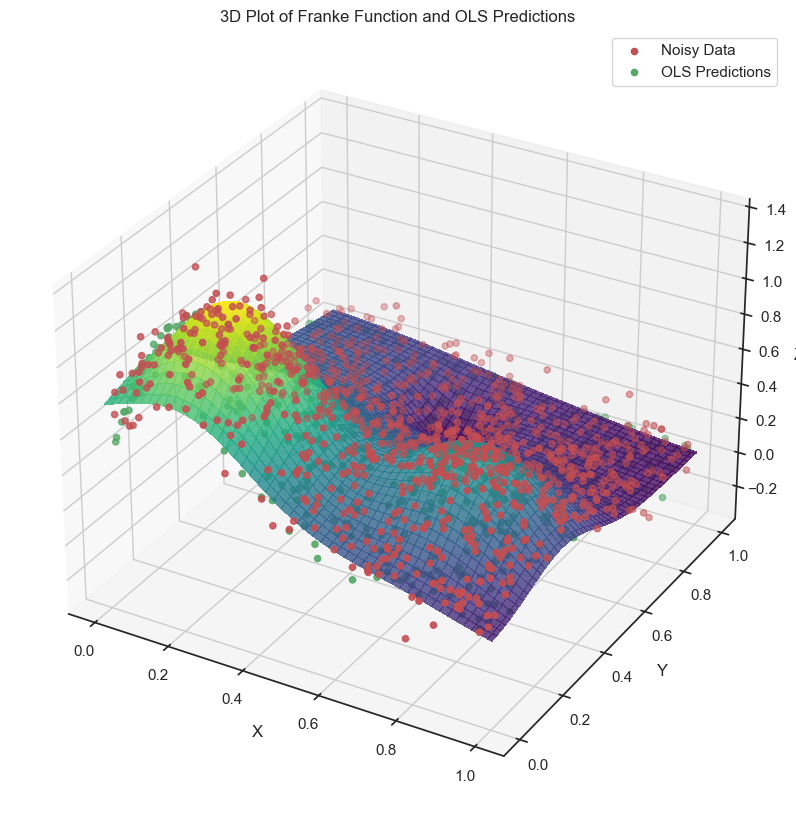

In [54]:
# Plot results
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)

ax.plot_surface(x_surf, y_surf, z_surf,cmap=cm.viridis,alpha=0.8, linewidth=0, antialiased=False)

# Plot the predictions
ax.scatter(x, y, z, color='r', label='Noisy Data') # --> data from Franke's function with noise
ax.scatter(x, y, z_pred_sklearn, color='g', label='OLS Predictions') # --> OLS predictions

ax.set_title('3D Plot of Franke Function and OLS Predictions', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

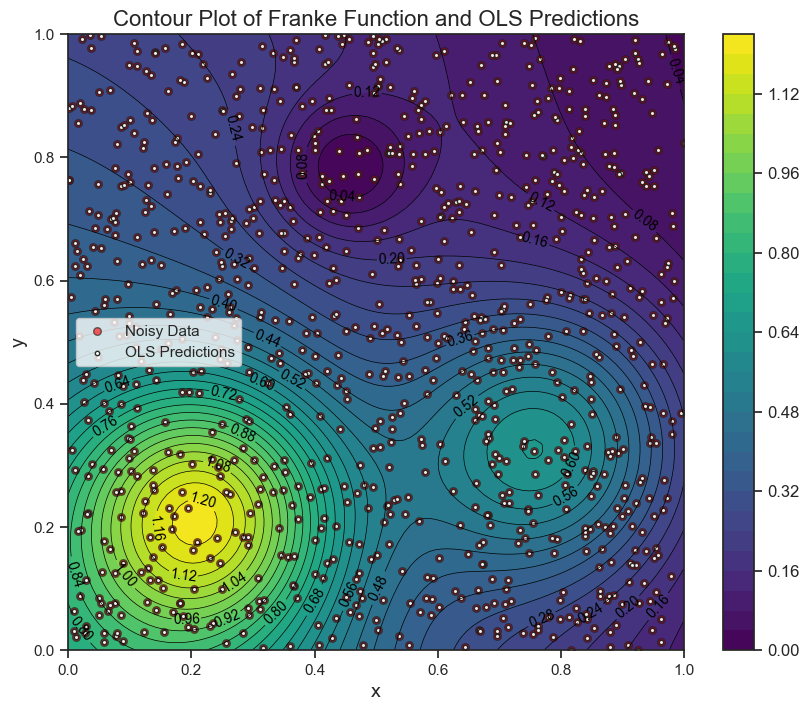

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(x_surf, y_surf, z_surf, levels=30, cmap=cm.viridis)
contour_lines = ax.contour(x_surf, y_surf, z_surf, levels=30, colors='black', linewidths=0.5)
ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
scatter_noisy = ax.scatter(x, y, c='red', s=30, edgecolor='k', label='Noisy Data', alpha=0.6)  # Noisy Data
scatter_ols = ax.scatter(x, y, c='white', s=10,edgecolor='k',  label='OLS Predictions', alpha=0.9)  # OLS Predictions

ax.set_title('Contour Plot of Franke Function and OLS Predictions', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

cbar = fig.colorbar(contour, ax=ax)
cbar.ax.tick_params(labelsize=12)
ax.set_aspect('equal', 'box')
ax.legend()
plt.show()


Degree: 1 	 Train MSE: 0.0318 	 Test MSE: 0.0369 	 Train R²: 0.6329 	 Test R²: 0.6015
Degree: 2 	 Train MSE: 0.0257 	 Test MSE: 0.0310 	 Train R²: 0.7030 	 Test R²: 0.6655
Degree: 3 	 Train MSE: 0.0168 	 Test MSE: 0.0202 	 Train R²: 0.8062 	 Test R²: 0.7823
Degree: 4 	 Train MSE: 0.0140 	 Test MSE: 0.0157 	 Train R²: 0.8382 	 Test R²: 0.8305
Degree: 5 	 Train MSE: 0.0119 	 Test MSE: 0.0133 	 Train R²: 0.8621 	 Test R²: 0.8567
Degree: 6 	 Train MSE: 0.0112 	 Test MSE: 0.0124 	 Train R²: 0.8711 	 Test R²: 0.8666
Degree: 7 	 Train MSE: 0.0104 	 Test MSE: 0.0124 	 Train R²: 0.8798 	 Test R²: 0.8664
Degree: 8 	 Train MSE: 0.0101 	 Test MSE: 0.0118 	 Train R²: 0.8835 	 Test R²: 0.8727
Degree: 9 	 Train MSE: 0.0098 	 Test MSE: 0.0120 	 Train R²: 0.8863 	 Test R²: 0.8700
Degree: 10 	 Train MSE: 0.0101 	 Test MSE: 0.0118 	 Train R²: 0.8828 	 Test R²: 0.8727
Degree: 11 	 Train MSE: 0.0097 	 Test MSE: 0.0127 	 Train R²: 0.8876 	 Test R²: 0.8634
Degree: 12 	 Train MSE: 0.0094 	 Test MSE: 0.0125 	 

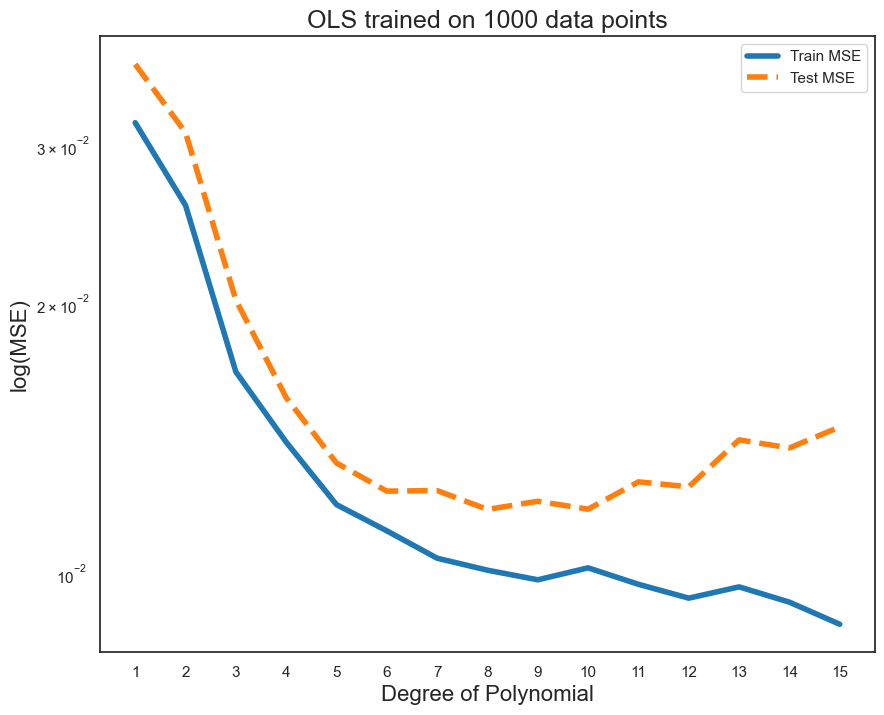

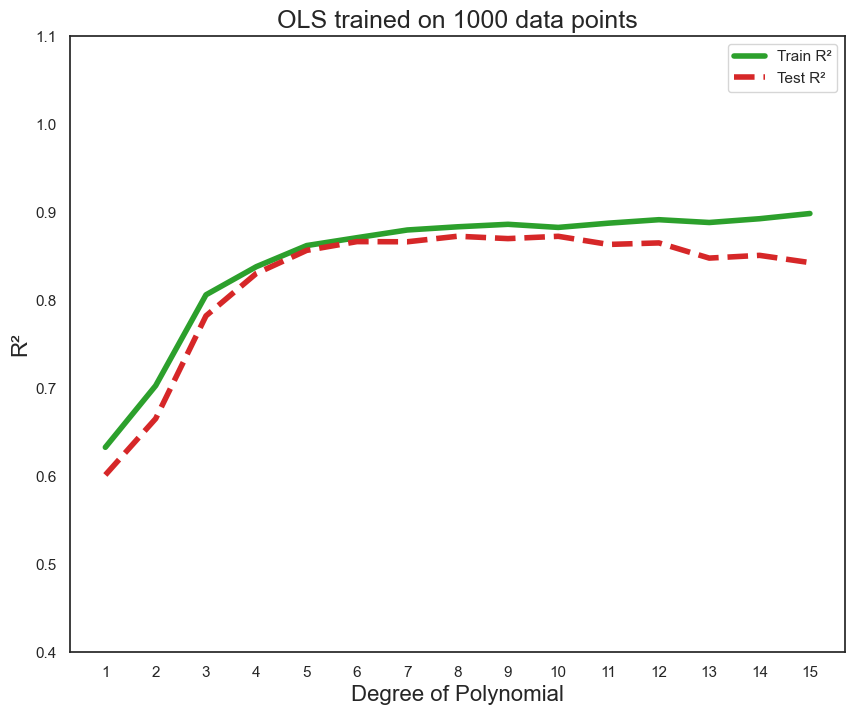

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

max_degree = 15

# Initializing arrays
mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []

# Split
X = np.column_stack((x, y)) # --> this is important, we need to merge x and y
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=10)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)
    print(f"Degree: {degree} \t Train MSE: {mse_train:.4f} \t Test MSE: {mse_test:.4f} \t Train R²: {r2_train:.4f} \t Test R²: {r2_test:.4f}")

sns.set_theme(style="white")

# Plotting MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', color='tab:blue', linewidth = 4)
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color='tab:orange', linewidth = 4)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('log(MSE)', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title('OLS trained on 1000 data points', fontsize=18) #MSE for Train & Test Data vs. Polynomial Degree, 
plt.yscale('log')
# plt.savefig('MSE_train_test_OLS_plot.pdf', format='pdf')
plt.legend()
plt.show()

# Plotting R² Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color='tab:green', linewidth = 4)
plt.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color='tab:red', linewidth = 4)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('R²', fontsize=16)
plt.ylim(0.4, 1.1)
plt.xticks(ticks=range(1, max_degree + 1))
# plt.title('R² for Train & Test Data vs. Polynomial Degree')
plt.title('OLS trained on 1000 data points', fontsize=18)
# plt.savefig('R2_train_test_OLS_plot.pdf', format='pdf')
plt.legend()
plt.show()

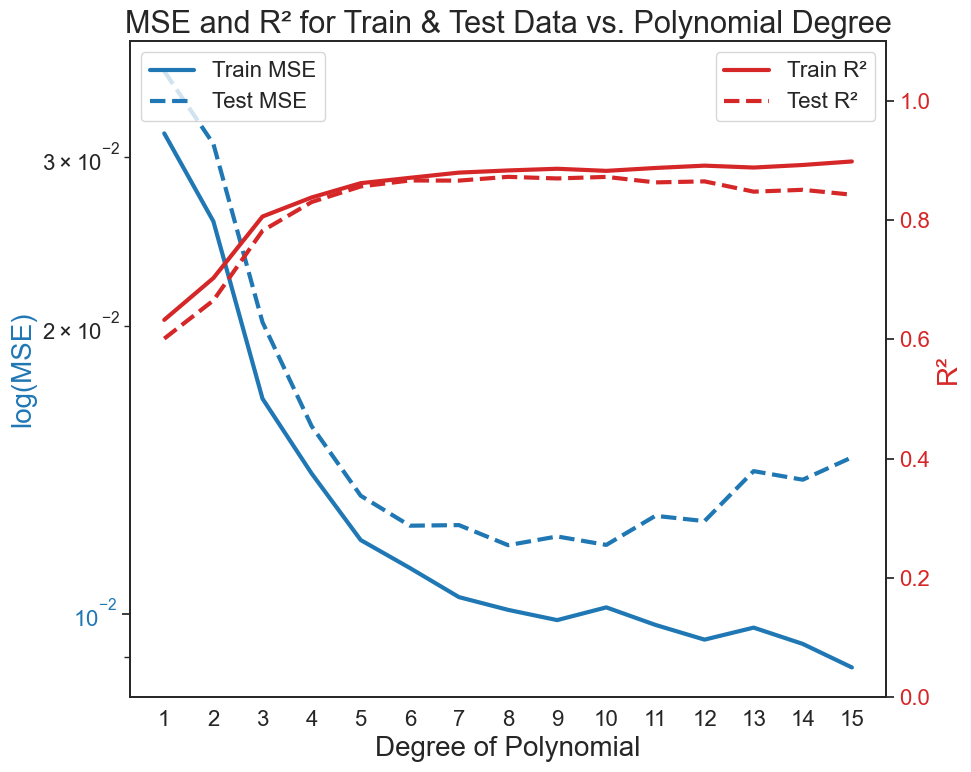

In [57]:
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "lines.linewidth": 3,
})

fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot
color = 'tab:blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('log(MSE)', color=color)
ax1.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', color=color)
ax1.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color=color)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, max_degree + 1))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)
plt.title('MSE and R² for Train & Test Data vs. Polynomial Degree', fontsize=22)

fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# plt.savefig("mse_r2_plot.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [58]:
# plt.rcParams.update({
#     "font.size": 16,             # Font size for text
#     "axes.labelsize": 20,        # Font size for axis labels
#     "xtick.labelsize": 16,       # Font size for x-axis tick labels
#     "ytick.labelsize": 16,       # Font size for y-axis tick labels
#     "legend.fontsize": 16,       # Font size for legend
#     "lines.linewidth": 3,        # Line width
# })

# # Create the figure and axes
# fig, ax1 = plt.subplots(figsize=(10, 8), dpi=300)  # High DPI for better quality

# # Plotting MSE on the first y-axis
# color = 'tab:blue'
# ax1.set_xlabel('Degree of Polynomial')
# ax1.set_ylabel('log(MSE)', color=color)
# ax1.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', color=color)
# ax1.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color=color)
# ax1.set_yscale('log')
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_xticks(range(1, max_degree + 1))

# # Create a second y-axis for R²
# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('R²', color=color)
# ax2.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color=color)
# ax2.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0, 1.1)

# # Adding title and legends
# plt.title('MSE and R² for Train & Test Data vs. Polynomial Degree', fontsize=22)
# fig.tight_layout()  # Adjust layout to prevent clipping
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# # Save the figure as a PDF for LaTeX
# # plt.savefig("mse_r2_plot.pdf", format='pdf', bbox_inches='tight')
# plt.show()

### Conclusions
**MSE Train vs Test**
- As the polynomial degree increases, the training MSE (blue line) consistently decreases, particularly from degrees 9 to 15, indicating that the model becomes better at fitting the training data.
- Conversely, the test MSE (orange line) decreases initially, reaches a minimum, and then increases rapidly beyond degree 6. This pattern indicates that the model starts to overfit the training data, capturing noise and losing its ability to generalize to unseen test data.
- The significant gap between the training and test MSE for degrees higher than 7 is a clear indicator of overfitting.

**R2 Train vs Test**
- For the training set, the R² score (blue line) improves steadily with increasing polynomial degrees, approaching 1 as the model complexity increases. This suggests that the model is capturing all variations in the training data, further confirming overfitting.
- For the test set, the R² (orange line) initially increases, peaks around degree 4, and then drops sharply to zero or negative values around degree 7. A negative R² indicates that the model is performing worse than a simple mean predictor.
- This sharp drop in the test R² score is aligned with the observed increase in test MSE, highlighting a strong overfitting effect.

The analysis suggests that a polynomial degree around 4-6 offers the best trade-off between bias and variance for this dataset, as indicated by the minimal test MSE and stable test R² values.


Also Hastie et al. emphasize that as the model complexity increases (e.g., by using higher-degree polynomials), the variance of the model increases, while the bias decreases. This trend is evident in the MSE plot, where the training MSE decreases with higher polynomial degrees, showing low bias. However, the corresponding test MSE starts to increase, indicating high variance and overfitting.

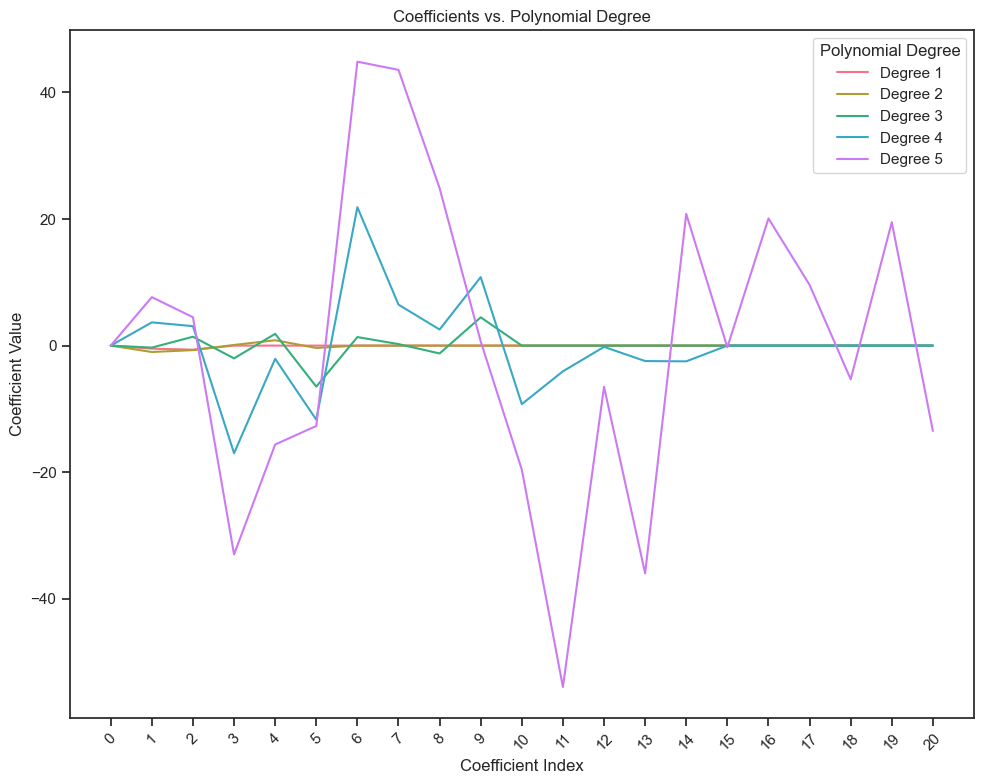

In [59]:
max_degree = 5
coefficients = []

# Split
X = np.column_stack((x, y))  # Merge x and y
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=10)

# Loop to fit polynomial models and store coefficients
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    coefficients.append(model.coef_)

# Convert coefficients to a numpy array
max_coefficients_length = max(len(coef) for coef in coefficients)
padded_coefficients = [np.pad(coef, (0, max_coefficients_length - len(coef)), 'constant') for coef in coefficients]
padded_coefficients = np.array(padded_coefficients)

plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "lines.linewidth": 3,
})

sns.set_theme(style="ticks")
colors = sns.color_palette("husl", max_degree)

# Plotting
plt.figure(figsize=(10, 8))
for i in range(max_degree):
    plt.plot(range(len(padded_coefficients[i])), padded_coefficients[i], label=f'Degree {i + 1}', color=colors[i])
    
plt.xticks(ticks=range(len(padded_coefficients[0])), labels=range(len(padded_coefficients[0])), rotation=45)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Polynomial Degree')
plt.legend(title='Polynomial Degree')
plt.tight_layout()
plt.show()


In [60]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# # Maximum polynomial degree
# max_degree = 5
# coefficients = []

# # Merge x and y for model fitting
# X = np.column_stack((x.flatten(), y.flatten()))  # Flatten for 2D input
# X_train, X_test, y_train, y_test = train_test_split(X, z.flatten(), test_size=0.2, random_state=10)

# # Loop to fit polynomial models and store coefficients
# for degree in range(1, max_degree + 1):
#     poly = PolynomialFeatures(degree)
#     X_train_poly = poly.fit_transform(X_train)
#     X_test_poly = poly.transform(X_test)

#     model = LinearRegression()
#     model.fit(X_train_poly, y_train)
    
#     coefficients.append(model.coef_)

# # Convert coefficients to a numpy array
# max_coefficients_length = max(len(coef) for coef in coefficients)
# padded_coefficients = [np.pad(coef, (0, max_coefficients_length - len(coef)), 'constant') for coef in coefficients]
# padded_coefficients = np.array(padded_coefficients)

# # Set seaborn style
# sns.set_theme(style="ticks")

# # Define a list of colors for each degree
# colors = sns.color_palette("husl", max_degree)  # Use seaborn's color palette

# # Plotting
# plt.figure(figsize=(10, 8), dpi=300)  # High DPI for better quality
# for i in range(max_degree):
#     plt.plot(range(len(padded_coefficients[i])), padded_coefficients[i], label=f'Degree {i + 1}', color=colors[i])
    
# plt.xticks(ticks=range(len(padded_coefficients[0])), labels=range(len(padded_coefficients[0])), rotation=45)
# plt.xlabel('Coefficient Index', fontsize=16)
# plt.ylabel('Coefficient Value', fontsize=16)
# plt.title('Coefficients vs. Polynomial Degree', fontsize=20)
# plt.legend(title='Polynomial Degree', fontsize=14)
# plt.tight_layout()

# # Save the figure as a PDF for LaTeX
# # plt.savefig("coefficients_plot.pdf", format='pdf', bbox_inches='tight')
# plt.show()

### Solution (Scaled)

In [61]:
# first we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 1000 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

print(np.var(z))

0.08789466766085462


In [62]:
# defining a func to create the design matrix
def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in poly
    X = np.ones((N, l)) # --> we use ones matrix as starting point
    idx = 1
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x**(i-j)) * (y**j)
            idx += 1
    return X

# Create design matrix for fifth-degree polynomial
X_manual = design_matrix(x, y, 5)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_manual, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_mean = np.mean(X_train_poly, axis=0)

X_train_scaled = X_train_poly - X_train_mean
X_test_scaled = X_test_poly - X_train_mean 

y_scaler = np.mean(y_train)

y_train_scaled = y_train - y_scaler
y_test_scaled = y_test - y_scaler

print( X_train_mean)

[1.         1.         0.51233475 ... 0.01689688 0.02461134 0.04772692]


In [64]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train_poly)
X_test_scaled = scaler_X.transform(X_test_poly)
print(scaler_X.mean_)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

[1.         1.         0.51233475 ... 0.01689688 0.02461134 0.04772692]


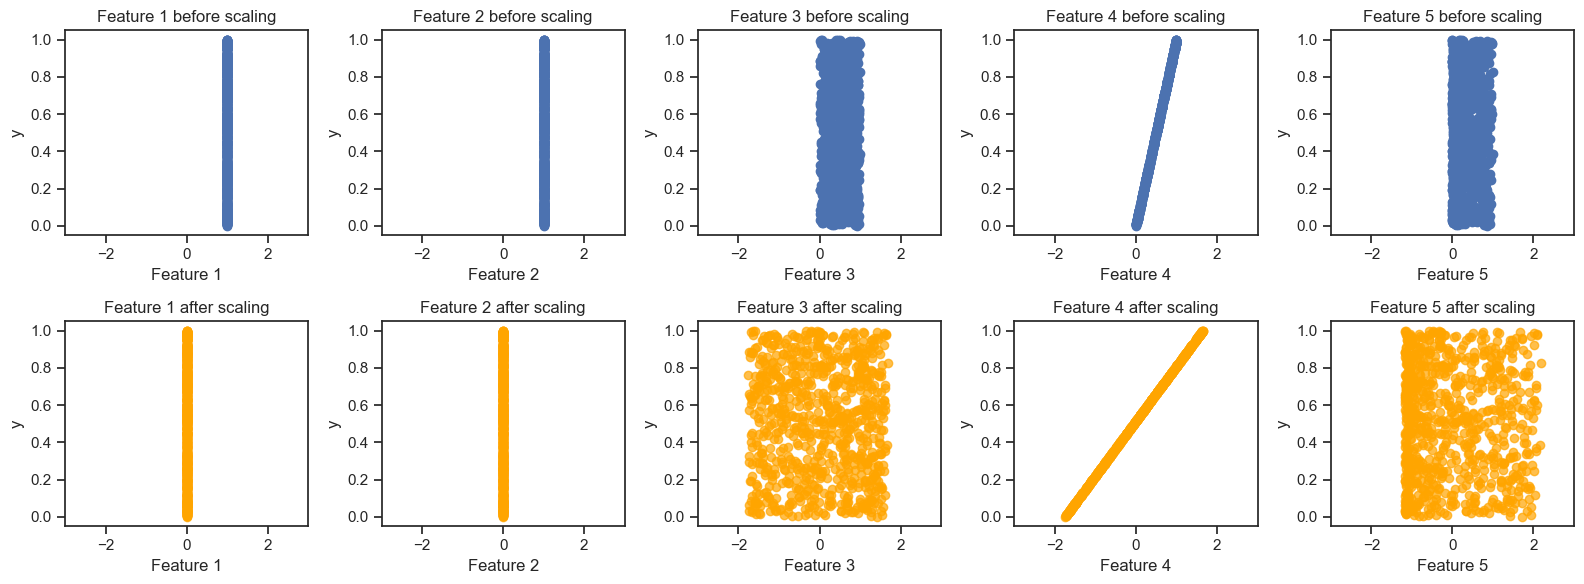

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_poly and y_train are already defined

# Plot before scaling
n_features = 5
plt.figure(figsize=(16, 6))
x_limits = [(-3, 3)] * 5

for i in range(n_features):
    plt.subplot(2, n_features, i + 1)
    plt.scatter(X_train_poly[:, i], y_train, alpha=1)  # Use X_train_poly for polynomial features
    plt.title(f'Feature {i + 1} before scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

# Plot after scaling
for i in range(n_features):
    plt.subplot(2, n_features, n_features + i + 1)
    plt.scatter(X_train_scaled[:, i], y_train, alpha=0.7, color='orange')  # Use scaled features
    plt.title(f'Feature {i + 1} after scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

plt.tight_layout()
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = np.column_stack((x, y))  # remember that z = f(x,y)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Scaling only on X (xy)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Model
model = LinearRegression()
model.fit(X_train_poly, z_train_scaled)

z_train_pred_scaled = model.predict(X_train_poly)
z_test_pred_scaled = model.predict(X_test_poly)

# Re-scaling
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

# eval
train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)
train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

print(f"Train MSE:\t {train_mse:.5f}")
print(f"Train R2:\t {train_r2:.5f}")
print(f"Test MSE:\t {test_mse:.5f}")
print(f"Test R2:\t {test_r2:.5f}")

Train MSE:	 0.01194
Train R2:	 0.86323
Test MSE:	 0.01347
Test R2:	 0.85025


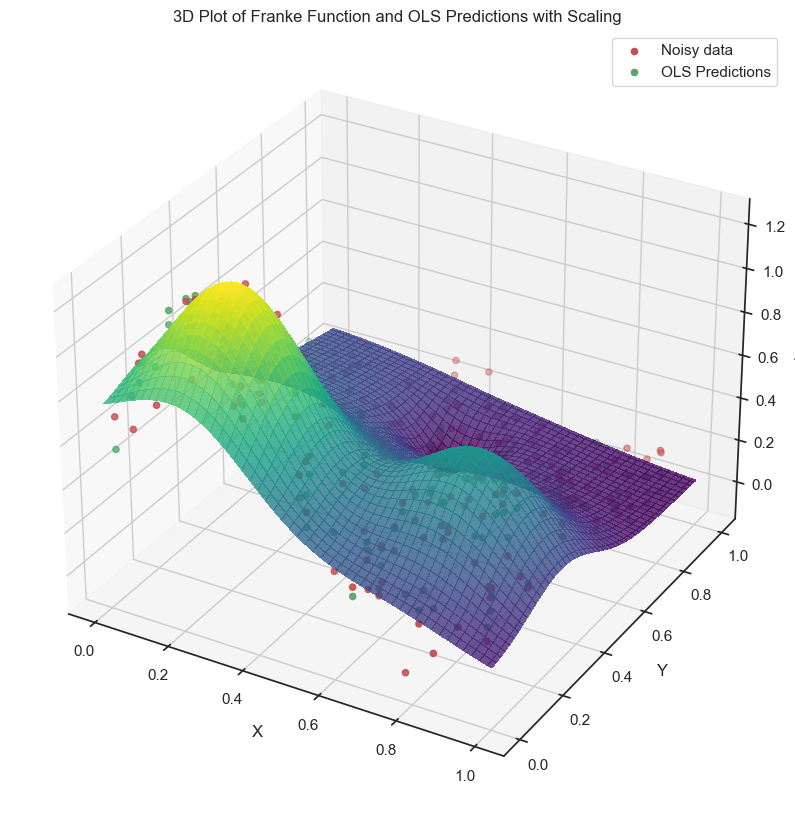

In [67]:
# Plot the results
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)

ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.viridis, alpha=0.8, linewidth=0, antialiased=False)

ax.scatter(X_test[:, 0], X_test[:, 1], z_test, color='r', label='Noisy data')
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='g', label='OLS Predictions')

ax.set_title('3D Plot of Franke Function and OLS Predictions with Scaling', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = np.column_stack((x, y))  # remember that z = f(x,y)

# Scaling only on X (xy)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_scaled)

# # Scaling on z
# scaler_z = StandardScaler()
# z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
# z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Model
model = LinearRegression()
model.fit(X_poly, z)

z_pred = model.predict(X_poly)

# Re-scaling
# z_pred = scaler_z.inverse_transform(z_train_scaled.reshape(-1, 1)).ravel()

# eval
train_mse = mean_squared_error(z, z_pred)
train_r2 = r2_score(z, z_pred)

print(f"Train MSE:\t {train_mse:.5f}")
print(f"Train R2:\t {train_r2:.5f}")

Train MSE:	 0.01216
Train R2:	 0.86161


Degree: 1 	 Train MSE: 0.0318 	 Test MSE: 0.0369 	 Train R²: 0.6329 	 Test R²: 0.6015
Degree: 2 	 Train MSE: 0.0257 	 Test MSE: 0.0310 	 Train R²: 0.7030 	 Test R²: 0.6655
Degree: 3 	 Train MSE: 0.0168 	 Test MSE: 0.0202 	 Train R²: 0.8062 	 Test R²: 0.7823
Degree: 4 	 Train MSE: 0.0140 	 Test MSE: 0.0157 	 Train R²: 0.8382 	 Test R²: 0.8305
Degree: 5 	 Train MSE: 0.0119 	 Test MSE: 0.0133 	 Train R²: 0.8621 	 Test R²: 0.8567
Degree: 6 	 Train MSE: 0.0112 	 Test MSE: 0.0123 	 Train R²: 0.8711 	 Test R²: 0.8667
Degree: 7 	 Train MSE: 0.0104 	 Test MSE: 0.0121 	 Train R²: 0.8804 	 Test R²: 0.8697
Degree: 8 	 Train MSE: 0.0101 	 Test MSE: 0.0118 	 Train R²: 0.8835 	 Test R²: 0.8727
Degree: 9 	 Train MSE: 0.0098 	 Test MSE: 0.0120 	 Train R²: 0.8863 	 Test R²: 0.8700
Degree: 10 	 Train MSE: 0.0105 	 Test MSE: 0.0132 	 Train R²: 0.8786 	 Test R²: 0.8577
Degree: 11 	 Train MSE: 0.0097 	 Test MSE: 0.0122 	 Train R²: 0.8884 	 Test R²: 0.8686
Degree: 12 	 Train MSE: 0.0109 	 Test MSE: 0.0155 	 

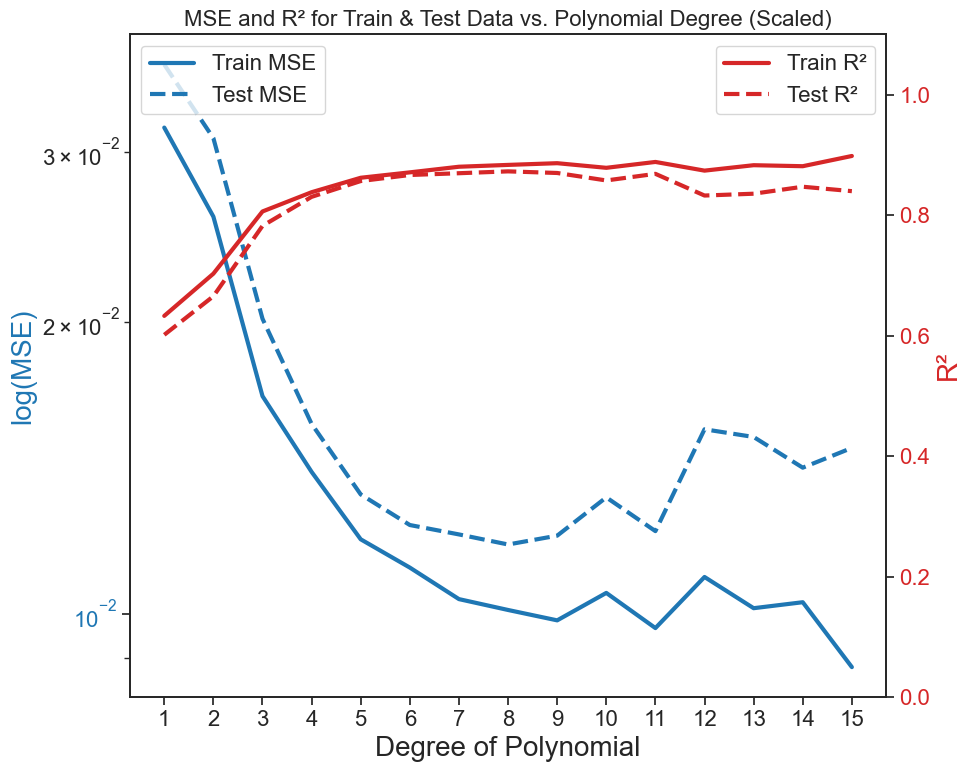

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

max_degree = 15

mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=10)

for degree in range(1, max_degree + 1):
    # Scaling
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    scaler_z = StandardScaler()
    z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
    z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

    model = LinearRegression()
    model.fit(X_train_poly, z_train_scaled)

    z_train_pred_scaled = model.predict(X_train_poly)
    z_test_pred_scaled = model.predict(X_test_poly)

    z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
    z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

    train_mse = mean_squared_error(z_train, z_train_pred)
    test_mse = mean_squared_error(z_test, z_test_pred)
    r2_train = r2_score(z_train, z_train_pred)
    r2_test = r2_score(z_test, z_test_pred)

    mse_train_values.append(train_mse)
    mse_test_values.append(test_mse)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)

    print(f"Degree: {degree} \t Train MSE: {train_mse:.4f} \t Test MSE: {test_mse:.4f} \t Train R²: {r2_train:.4f} \t Test R²: {r2_test:.4f}")

plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "lines.linewidth": 3,
})


fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot
color = 'tab:blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('log(MSE)', color=color)
ax1.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', color=color)
ax1.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color=color)
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, max_degree + 1))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)

plt.title('MSE and R² for Train & Test Data vs. Polynomial Degree (Scaled)', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.savefig("mse_r2_plot_scaled.pdf", format='pdf', bbox_inches='tight')
plt.show()

Degree: 1 	 Train MSE (OLS): 0.0318 	 Test MSE (OLS): 0.0369 	 Train MSE (Scaled): 0.0318 	 Test MSE (Scaled): 0.0369 	 Train R² (OLS): 0.6329 	 Test R² (OLS): 0.6015 	 Train R² (Scaled): 0.6329 	 Test R² (Scaled): 0.6015
Degree: 2 	 Train MSE (OLS): 0.0257 	 Test MSE (OLS): 0.0310 	 Train MSE (Scaled): 0.0257 	 Test MSE (Scaled): 0.0310 	 Train R² (OLS): 0.7030 	 Test R² (OLS): 0.6655 	 Train R² (Scaled): 0.7030 	 Test R² (Scaled): 0.6655
Degree: 3 	 Train MSE (OLS): 0.0168 	 Test MSE (OLS): 0.0202 	 Train MSE (Scaled): 0.0168 	 Test MSE (Scaled): 0.0202 	 Train R² (OLS): 0.8062 	 Test R² (OLS): 0.7823 	 Train R² (Scaled): 0.8062 	 Test R² (Scaled): 0.7823
Degree: 4 	 Train MSE (OLS): 0.0140 	 Test MSE (OLS): 0.0157 	 Train MSE (Scaled): 0.0140 	 Test MSE (Scaled): 0.0157 	 Train R² (OLS): 0.8382 	 Test R² (OLS): 0.8305 	 Train R² (Scaled): 0.8382 	 Test R² (Scaled): 0.8305
Degree: 5 	 Train MSE (OLS): 0.0119 	 Test MSE (OLS): 0.0133 	 Train MSE (Scaled): 0.0119 	 Test MSE (Scaled): 0

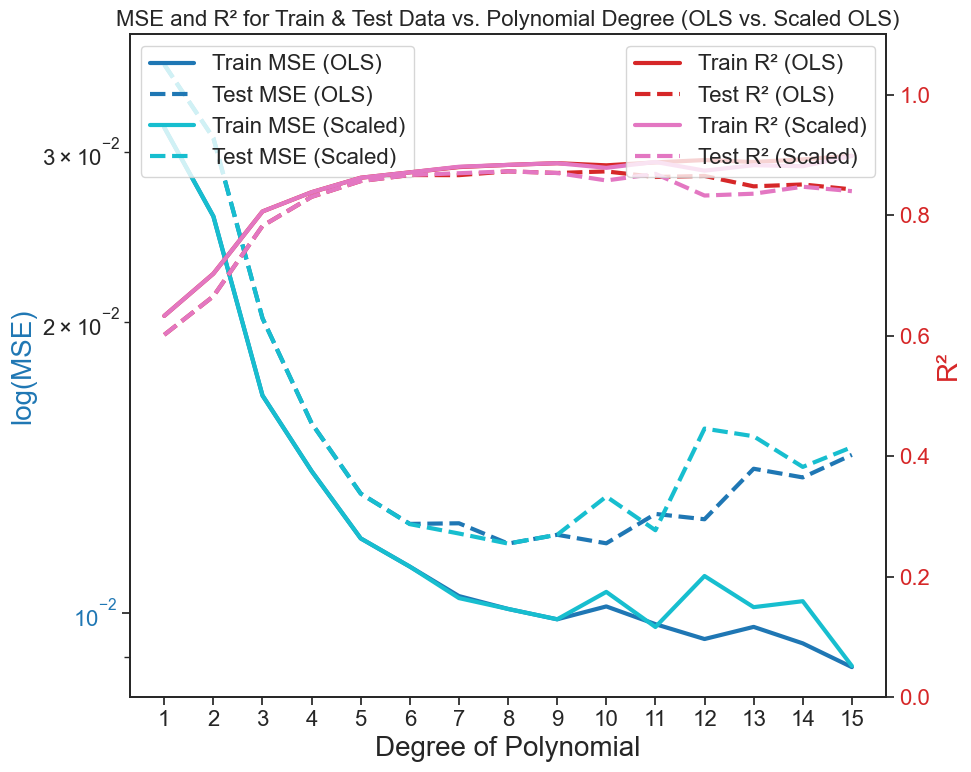

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

max_degree = 15

mse_train_ols = []
mse_test_ols = []
r2_train_ols = []
r2_test_ols = []

mse_train_scaled = []
mse_test_scaled = []
r2_train_scaled = []
r2_test_scaled = []

X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=10)

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model_ols = LinearRegression()
    model_ols.fit(X_train_poly, z_train)

    z_train_pred_ols = model_ols.predict(X_train_poly)
    z_test_pred_ols = model_ols.predict(X_test_poly)

    mse_train_ols.append(mean_squared_error(z_train, z_train_pred_ols))
    mse_test_ols.append(mean_squared_error(z_test, z_test_pred_ols))
    r2_train_ols.append(r2_score(z_train, z_train_pred_ols))
    r2_test_ols.append(r2_score(z_test, z_test_pred_ols))

    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    X_train_poly_scaled = poly.fit_transform(X_train_scaled)
    X_test_poly_scaled = poly.transform(X_test_scaled)

    model_scaled = LinearRegression()
    model_scaled.fit(X_train_poly_scaled, z_train)

    z_train_pred_scaled = model_scaled.predict(X_train_poly_scaled)
    z_test_pred_scaled = model_scaled.predict(X_test_poly_scaled)

    mse_train_scaled.append(mean_squared_error(z_train, z_train_pred_scaled))
    mse_test_scaled.append(mean_squared_error(z_test, z_test_pred_scaled))
    r2_train_scaled.append(r2_score(z_train, z_train_pred_scaled))
    r2_test_scaled.append(r2_score(z_test, z_test_pred_scaled))

    print(f"Degree: {degree} \t Train MSE (OLS): {mse_train_ols[-1]:.4f} \t Test MSE (OLS): {mse_test_ols[-1]:.4f} "
          f"\t Train MSE (Scaled): {mse_train_scaled[-1]:.4f} \t Test MSE (Scaled): {mse_test_scaled[-1]:.4f} "
          f"\t Train R² (OLS): {r2_train_ols[-1]:.4f} \t Test R² (OLS): {r2_test_ols[-1]:.4f} "
          f"\t Train R² (Scaled): {r2_train_scaled[-1]:.4f} \t Test R² (Scaled): {r2_test_scaled[-1]:.4f}")

plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "lines.linewidth": 3,
})

fig, ax1 = plt.subplots(figsize=(10, 8), dpi = 100)

color = 'tab:blue'
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('log(MSE)', color=color)
ax1.plot(range(1, max_degree + 1), mse_train_ols, label='Train MSE (OLS)', color=color)
ax1.plot(range(1, max_degree + 1), mse_test_ols, label='Test MSE (OLS)', linestyle='--', color=color)
ax1.plot(range(1, max_degree + 1), mse_train_scaled, label='Train MSE (Scaled)', color='tab:cyan')
ax1.plot(range(1, max_degree + 1), mse_test_scaled, label='Test MSE (Scaled)', linestyle='--', color='tab:cyan')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, max_degree + 1))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)
ax2.plot(range(1, max_degree + 1), r2_train_ols, label='Train R² (OLS)', color=color)
ax2.plot(range(1, max_degree + 1), r2_test_ols, label='Test R² (OLS)', linestyle='--', color=color)
ax2.plot(range(1, max_degree + 1), r2_train_scaled, label='Train R² (Scaled)', color='tab:pink')
ax2.plot(range(1, max_degree + 1), r2_test_scaled, label='Test R² (Scaled)', linestyle='--', color='tab:pink')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.1)

plt.title('MSE and R² for Train & Test Data vs. Polynomial Degree (OLS vs. Scaled OLS)', fontsize=16)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()

# plt.savefig("mse_r2_ols_scaled_plot2.pdf", format='pdf', bbox_inches='tight')
plt.show()
